### Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy.matlib
from mpl_toolkits.mplot3d import Axes3D

from utils_tp1 import *
from fonctions_tp1_interpolation import *

### Variables Globales

In [11]:
## Points  de contrôle initiaux 
nb_pts_controle = 5
X_pts_controles,Y_pts_controles = generate_points(nb_pts_controle)
borne_min = min(X_pts_controles); borne_max = max(X_pts_controles)

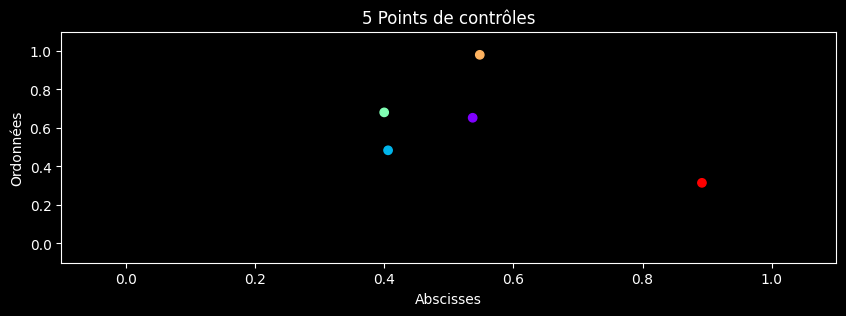

In [12]:
### Affichage
#plt.style.use('default')
plt.figure(figsize=(10, 3))
plt.xlabel('Abscisses'); plt.ylabel('Ordonnées')
plt.xlim([-epsilon,1+epsilon]); plt.ylim([-epsilon,1+epsilon])
plt.title(str(nb_pts_controle)+ ' Points de contrôles')
plt.scatter(X_pts_controles,Y_pts_controles, c=cm.rainbow(np.linspace(0, 1, len(X_pts_controles))))
plt.show()

# INTERPOLATION

## Cas fonctionnel (*y = f(x)*) : Lagrange

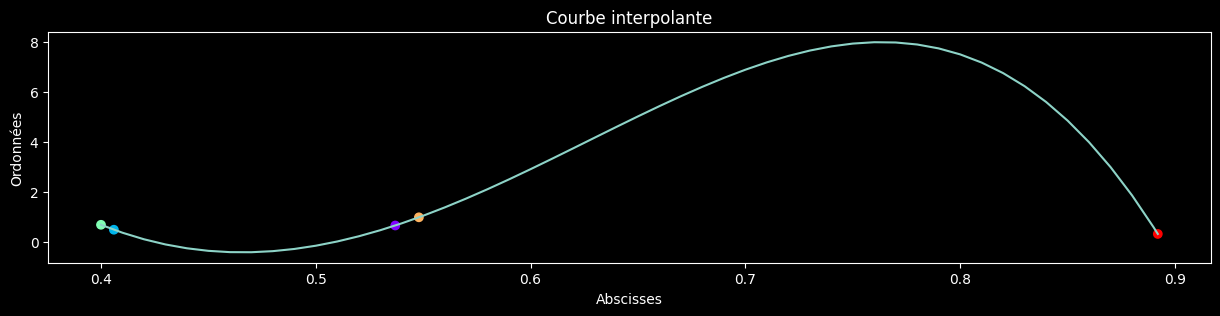

In [24]:
### Interpolation 
# Abscisses des points de la courbe en construction 
x_fonc = get_x_fonc(borne_min, borne_max)
y_fonc = []
for i in range(0, len(x_fonc)):
    y_fonc.append(lagrange(X_pts_controles, Y_pts_controles, x_fonc[i]))

### Affichage
plt.figure(figsize=(15, 3))
plt.xlabel('Abscisses'); plt.ylabel('Ordonnées'); plt.title('Courbe interpolante')
#plt.xlim([0,1]); plt.ylim([0,1])
plt.scatter(X_pts_controles,Y_pts_controles, c=cm.rainbow(np.linspace(0, 1, len(Y_pts_controles))))
plt.plot(x_fonc,y_fonc)
plt.show()


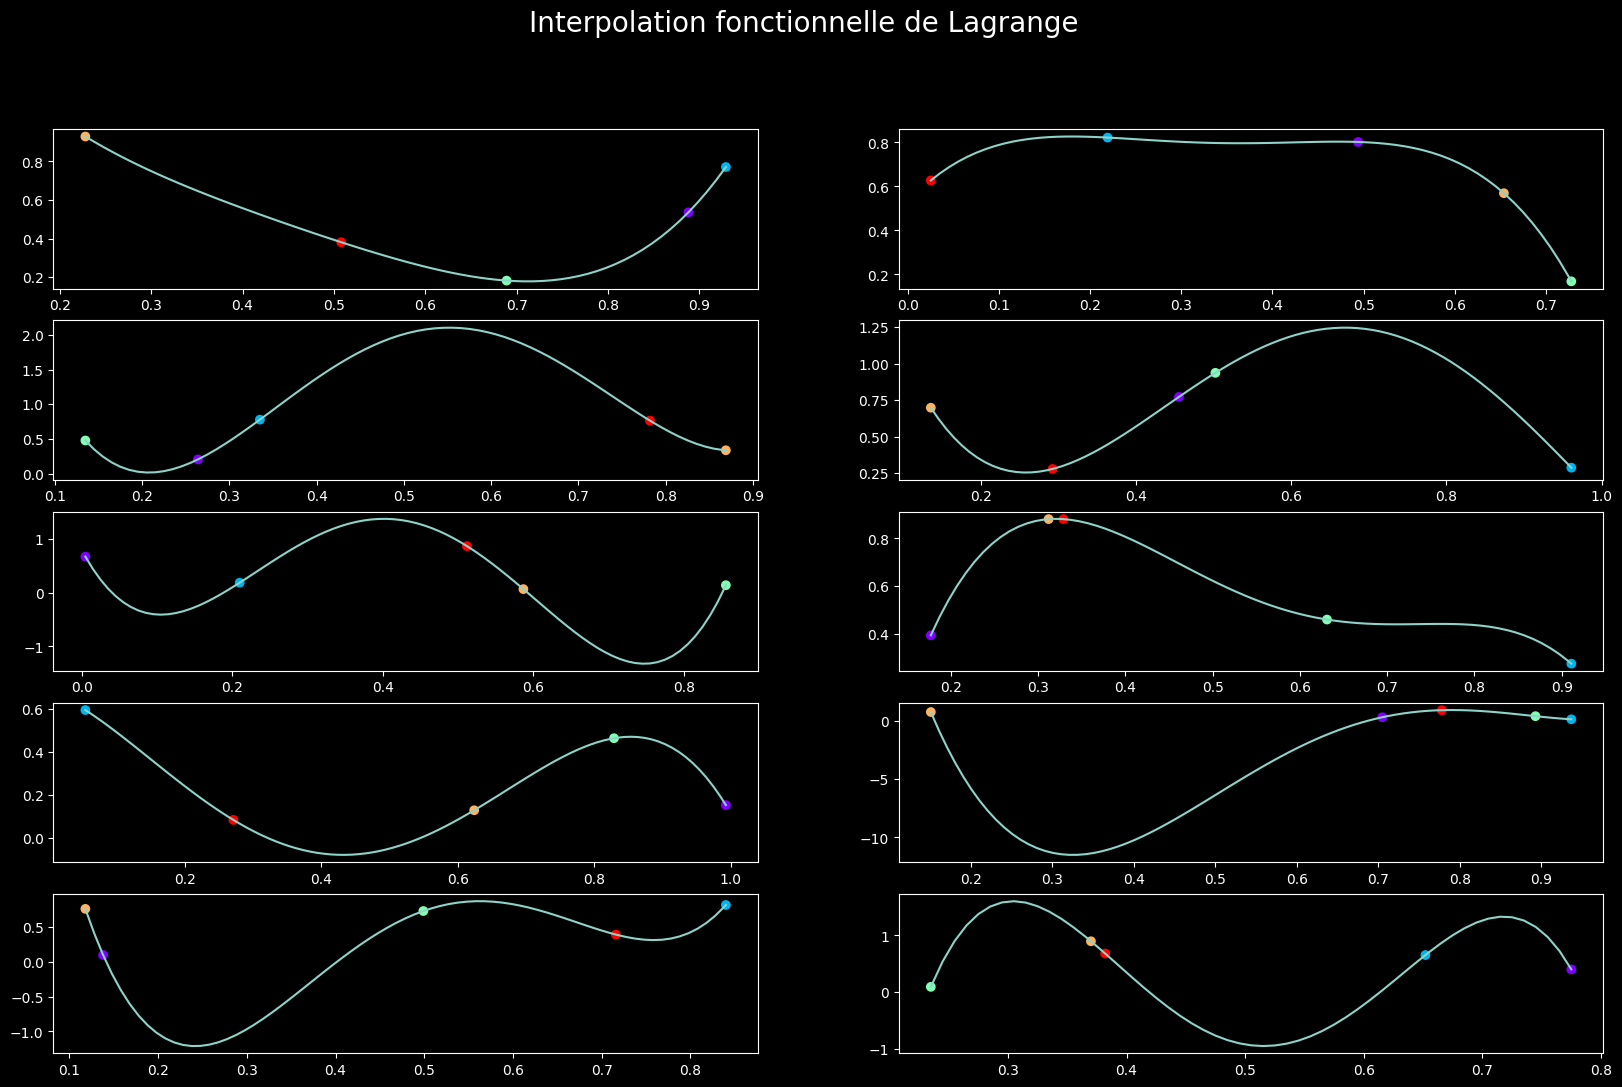

In [19]:
### Affichage n°2
multiple_affichage_lagrange(nb_pts_controle)

**REMARQUE** 

Avez-vous remarqué l'intervalle des valeurs de vos courbes ? 

Initiallement, vos points de contrôles ont une ordonnée entre 0 et 1.

**QUESTION** :

Quelle configuration des points de contrôles pose problème dans le cas fonctionnel ?

Proposez deux jeux de 5 points de contrôles illustrant ce problème : avec et sans problème.


**REPONSE** : 2 pts avec la même abscisse --> divise par 0 Dans lagrange ---> Courbe à l'infini

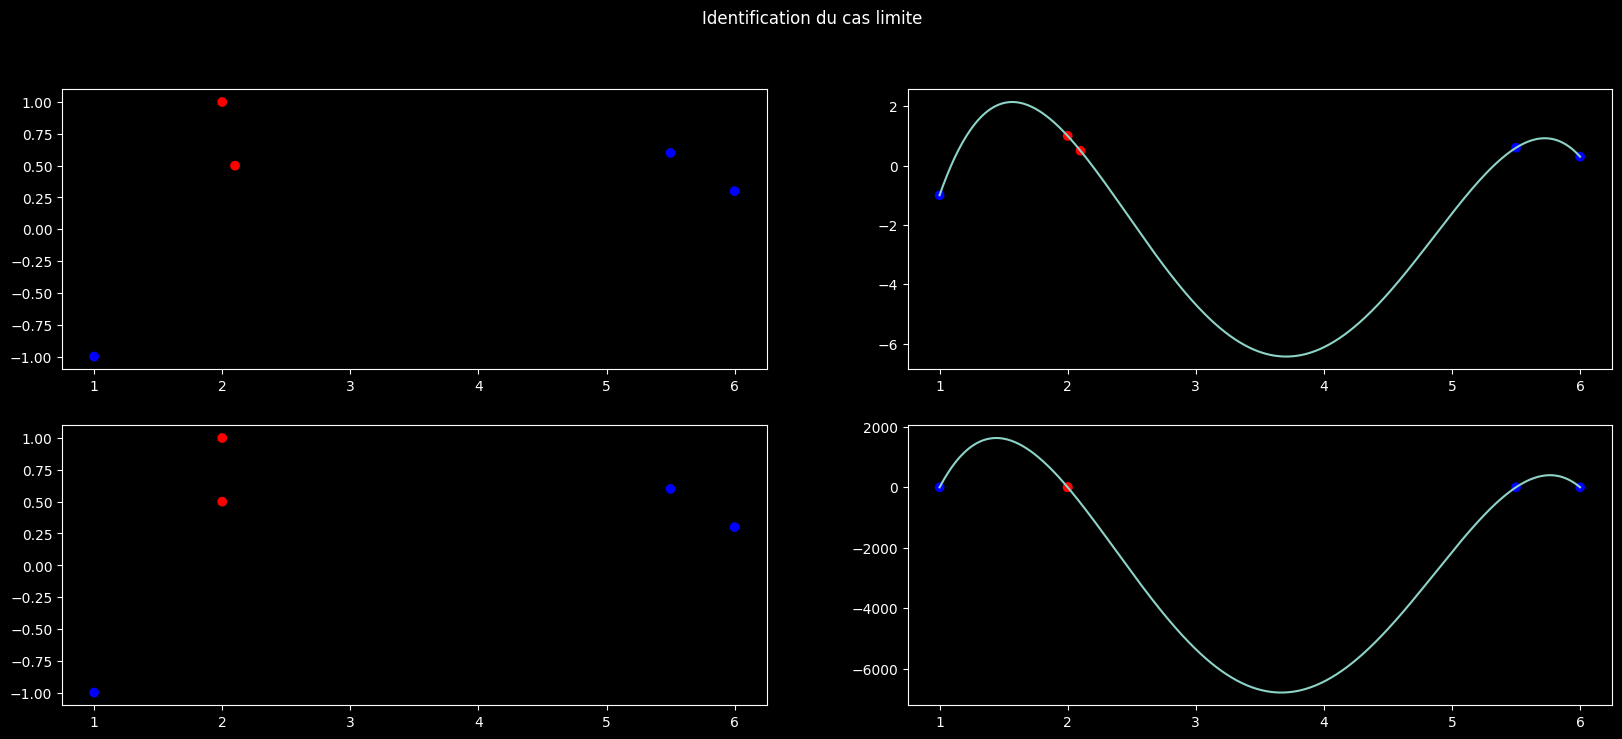

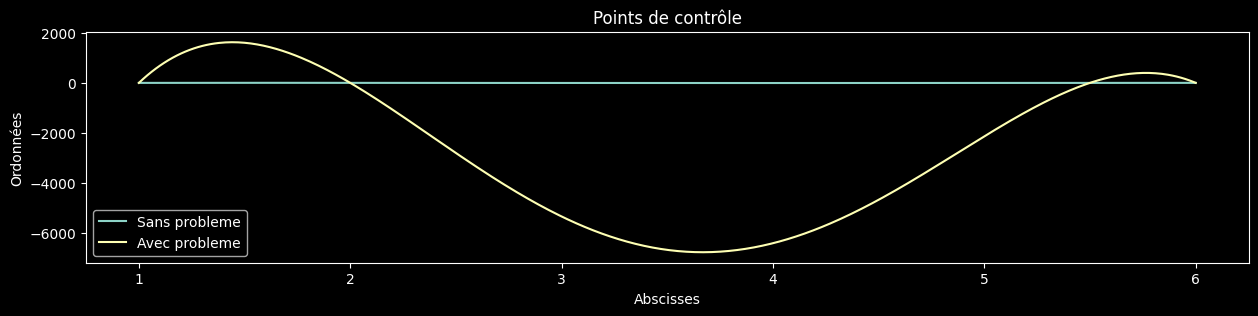

In [20]:
# Points de contrôle avec une BONNE configuration 
X1 = [1, 2, 2.1, 5.5, 6]; Y1 = [-1, 1, 0.5, 0.6, 0.3]
# Points de contrôle avec une MAUVAISE configuration 
X2 = [1, 2, 2.0001, 5.5, 6]; Y2 = Y1
colors = ['b', 'r', 'r', 'b', 'b']

### Affichage
configuration_problematique(X1, X2, Y1, Y2)

## Cas paramétrique (*(x,y) = f(t)*): Lagrange 

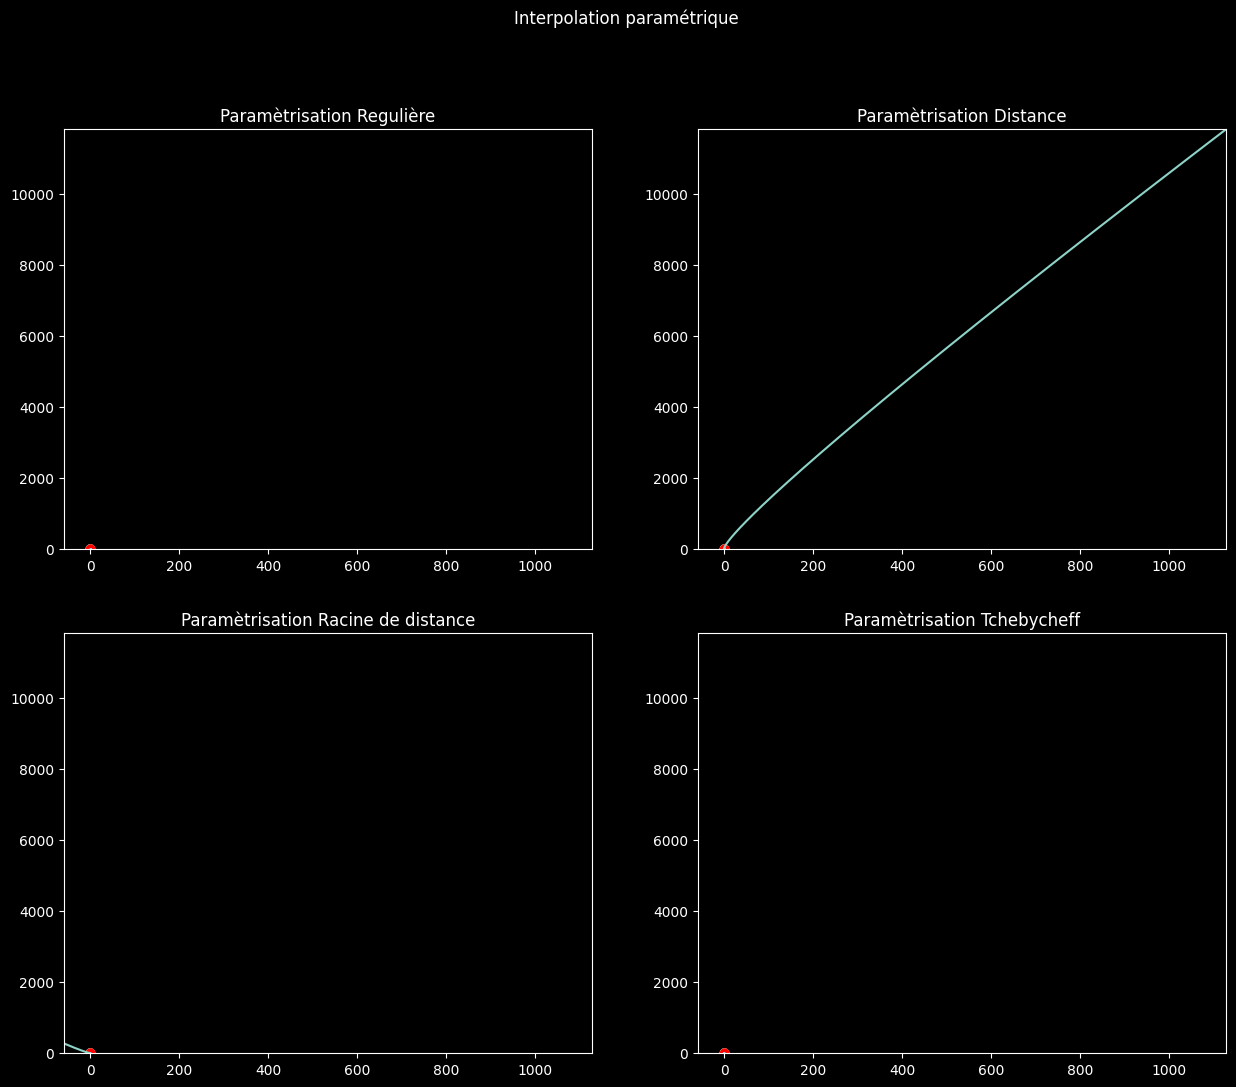

In [21]:
### Paramètrisation des temps
# Param Régulière
T_reg, list_t_reg = parametrisation_reguliere(nb_pts_controle, pas)
# Param Distance
T_dist, list_t_dist = parametrisation_distance(nb_pts_controle, pas, X_pts_controles, Y_pts_controles)
# Param Racine Distance
T_racdist, list_t_racdist = parametrisation_racinedistance(nb_pts_controle, pas, X_pts_controles, Y_pts_controles)
# Param Distance
T_Tche, list_t_Tche = parametrisation_Tchebycheff(nb_pts_controle, pas)

### Comparaison
T = [T_reg, T_dist, T_racdist, T_Tche]
list_t = [list_t_reg, list_t_dist, list_t_racdist, list_t_Tche]

comparaison_paramétrisation('lagrange', T, list_t, X_pts_controles, Y_pts_controles, meme_intervalle = True)


## Cas paramétrique : Neville

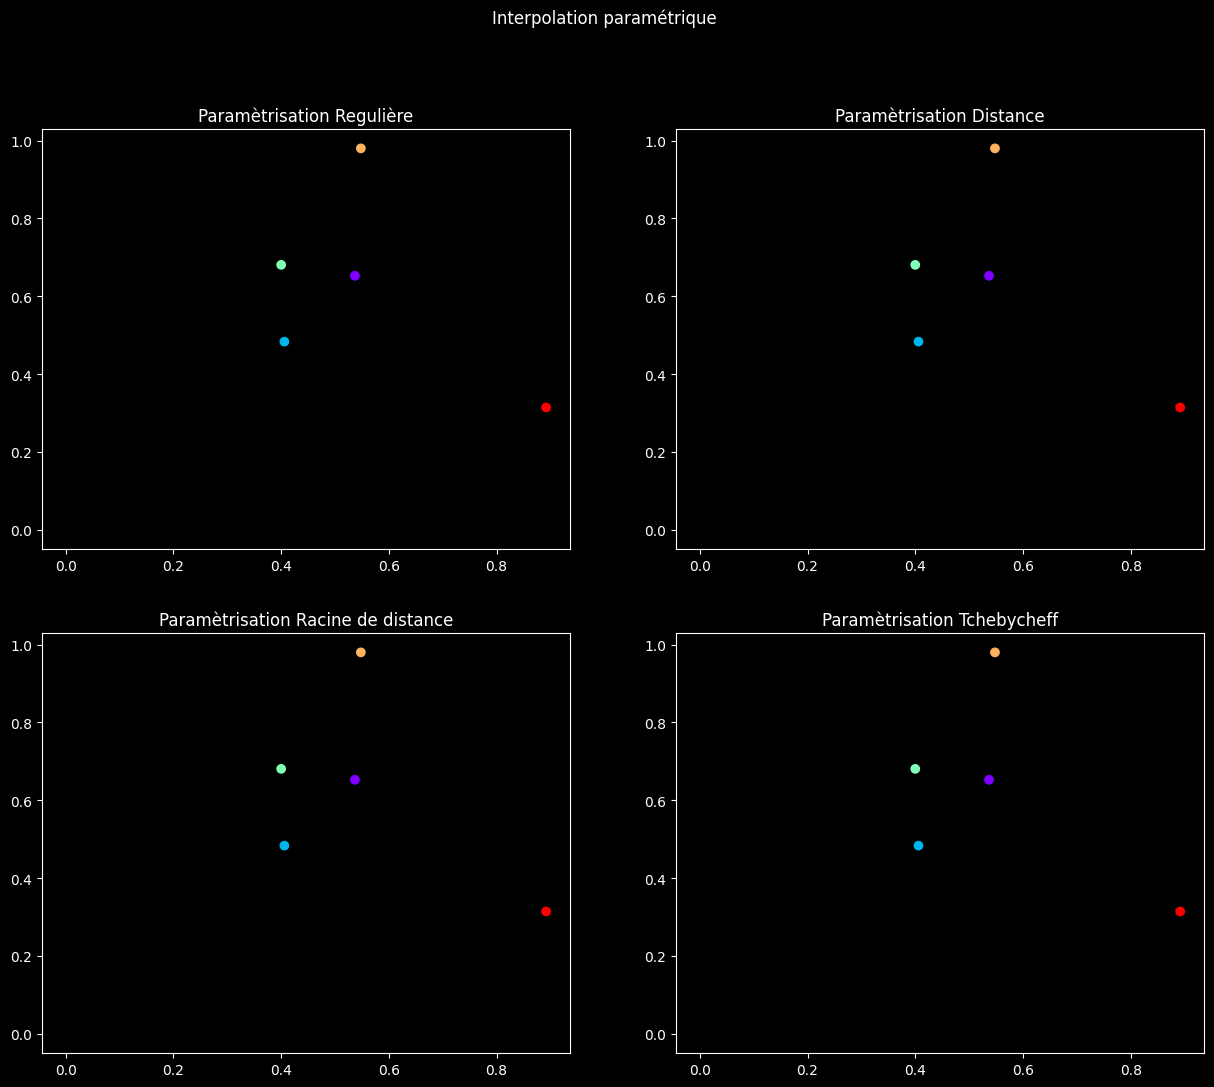

In [22]:
### Paramètrisation des temps
# Param Régulière
T_reg, list_t_reg = parametrisation_reguliere(nb_pts_controle, pas)
# Param Distance
T_dist, list_t_dist = parametrisation_distance(nb_pts_controle, pas, X_pts_controles, Y_pts_controles)
# Param Racine Distance
T_racdist, list_t_racdist = parametrisation_racinedistance(nb_pts_controle, pas, X_pts_controles, Y_pts_controles)
# Param Distance
T_Tche, list_t_Tche = parametrisation_Tchebycheff(nb_pts_controle, pas)

### Interpolation
labels_param = ['Regulière', 'Distance', 'Racine de distance', 'Tchebycheff']
T = [T_reg, T_dist, T_racdist, T_Tche]
list_t = [list_t_reg, list_t_dist, list_t_racdist, list_t_Tche]

comparaison_paramétrisation('neville', T, list_t, X_pts_controles, Y_pts_controles, meme_intervalle = False)


## Interpolation de Surface 

AttributeError: 'int' object has no attribute 'shape'

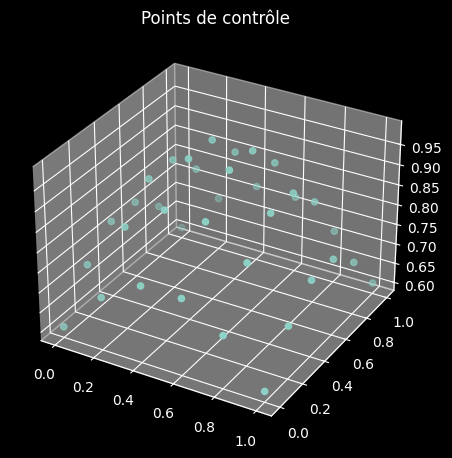

In [23]:
# Générer une grille de points de contrôle régulière
nb_point_grille = 6
X, Y = np.meshgrid(np.linspace(0, 1, nb_point_grille), np.linspace(0, 1, nb_point_grille))
Z = np.exp(-((X-0.5)**2  + (Y-0.5)**2))

# Paramétrisation 
pas_surface = 0.25
T, t_to_eval = parametrisation_reguliere(nb_point_grille, pas_surface)

# Interpoler la surface
interpolated_surface = interpolate_surface(X, Y, Z, T, t_to_eval, nb_point_grille)

# Visualisation
show_surface(X, Y, Z, interpolated_surface)
